In [1]:
import sys
from os import path
sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))
# sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))
import aestimo as solver
import config as ac
import database as adatabase
import numpy as np
import matplotlib.pyplot as plt
import copy
from pprint import pprint
     

WARNING aestimo logs automatically to aestimo.log in the example's directory.
WARNING psi_at_inf_cython module not found


In [2]:
q = 1.602176e-19 #C
meV2J=1e-3*q #meV to Joules

# Input File(s)
# -------------
ac.inputfilename = "sample-qw-barrierdope"

# Shooting method parameters for Schrödinger Equation solution
ac.delta_E = 0.5*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. 
ac.d_E = 1e-5*meV2J #Energy step (Joules) within Newton-Raphson method when improving the precision of the energy of a found level.
ac.E_start = 0.0    #Energy to start shooting method from (if E_start = 0.0 uses minimum of energy of bandstructure)
ac.Estate_convergence_test = 1e-9*meV2J
# FermiDirac
ac.FD_d_E = 1e-9 #Initial and minimum Energy step (meV) for derivative calculation for Newton-Raphson method to find E_F
ac.FD_convergence_test = 1e-6 #meV
ac.np_d_E = 1.0 # Energy step (meV) for dispersion calculations
# Poisson Loop
ac.damping = 0.5    #averaging factor between iterations to smooth convergence.
ac.max_iterations=80 #maximum number of iterations.
ac.convergence_test=1e-6 #convergence is reached when the ground state energy (meV) is stable to within this number between iterations.

# Output Files
# ------------

notebook_name = "x_sweep"
# filename_without_extension = path.splitext(path.basename("tutoria1_sef_consistent_debugging.ipynb"))[0]

ac.output_directory = notebook_name
ac.parameters = True
ac.electricfield_out = True
ac.potential_out = True
ac.sigma_out = True
ac.probability_out = True
ac.states_out = True

# Result Viewer
# -------------
ac.resultviewer = True
ac.wavefunction_scalefactor = 200 # scales wavefunctions when plotting QW diagrams
# Messages
# --------
ac.messagesoff = False
ac.logfile = 'aestimo.log'

#Here, we will alter the default settings of the config.py file for the purposes of this tutorial
ac.use_cython = False
# ac.messagesoff = True

In [3]:
class Structure(object): pass
s = Structure() # this will be our datastructure

# TEMPERATURE
s.T = 3.0 #Kelvin

# COMPUTATIONAL SCHEME
# 0: Schrodinger
# 1: Schrodinger + nonparabolicity
# 2: Schrodinger-Poisson
# 3: Schrodinger-Poisson with nonparabolicity
# 4: Schrodinger-Exchange interaction
# 5: Schrodinger-Poisson + Exchange interaction
# 6: Schrodinger-Poisson + Exchange interaction with nonparabolicity
s.computation_scheme =3

# Non-parabolic effective mass function
# 0: no energy dependence
# 1: Nelson's effective 2-band model
# 2: k.p model from Vurgaftman's 2001 paper
s.meff_method = 2

# Non-parabolic Dispersion Calculations for Fermi-Dirac
s.fermi_np_scheme = True #needed only for aestimo_numpy2.py

# QUANTUM
# Total subband number to be calculated for electrons
s.subnumber_e = 3
# Total subband number to be calculated for electrons (needed only for aestimo_numpy_h)
s.subnumber_h = 1 

# APPLIED ELECTRIC FIELD
s.Fapplied = 0.00/50e-9 # (V/m)

# --------------------------------
# REGIONAL SETTINGS FOR SIMULATION
# --------------------------------

# GRID
# For 1D, z-axis is choosen
s.gridfactor = 0.01 #nm
s.maxgridpoints = 200000 #for controlling the size

dopant = 5.0e18 #cm^-3, doping concentration
well_l = 16.0
x_frac = 0.3
s.material =[[ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
            [ 4.0, 'AlGaAs', x_frac, 0.0, 'n'],
            [ well_l, 'GaAs', 0, 0, 'n'],
            [ 4.0, 'AlGaAs', x_frac, 0.0, 'n'],
            [ 1.0, 'AlGaAs', x_frac, dopant, 'n']]
structure0 = s

INFO Total layer number: 5
INFO Total number of materials in database: 25
INFO Ntotal2d 1e+16 m**-2
INFO Iteration: 1
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO Working for subband no: 3
INFO E[0]= 940.657601 meV
INFO E[1]= 986.801608 meV
INFO E[2]= 1056.726893 meV
INFO meff[0]= 0.062378
INFO meff[1]= 0.064904
INFO meff[2]= 0.068862
INFO N[0]= 1e+16 m**-2
INFO N[1]= 1.56176 m**-2
INFO N[2]= 0 m**-2
INFO Efermi (at 3K) = 978.494 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge = 1e+16 m**-2
INFO total system charge = -24.6641 m**-2
INFO Iteration: 2
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO Working for subband no: 3
INFO E[0]= 971.006544 meV
INFO E[1]= 1012.852779 meV
INFO E[2]= 1082.188733 meV
INFO meff[0]= 0.062403
INFO meff[1]= 0.064959
INFO meff[2]= 0.068933
INFO N[0]= 1e+16 m**-2
INFO N[1]= 874756 m**-2
INFO N[2]= 0 m**-2
INFO Efermi (at 3K) = 1007.96 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge 

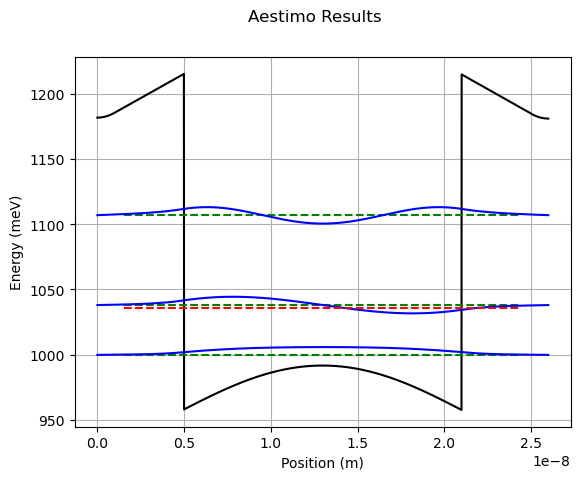

INFO Simulation is finished.


In [4]:
# Initialise structure class
model = solver.StructureFrom(structure0,adatabase) # structure could also be a dictionary.
    
#calculate QW states
result = solver.Poisson_Schrodinger(model)

%matplotlib inline
#solver.save_and_plot(result,model) # Write the simulation results in files
solver.QWplot(result,figno=None) # Plot QW diagram
solver.logger.info("Simulation is finished.")

INFO Total layer number: 5
INFO Total number of materials in database: 25
INFO Ntotal2d 1e+16 m**-2
INFO Iteration: 1
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO Working for subband no: 3
INFO E[0]= 940.657601 meV
INFO E[1]= 986.801608 meV
INFO E[2]= 1056.726893 meV
INFO meff[0]= 0.062378
INFO meff[1]= 0.064904
INFO meff[2]= 0.068862
INFO N[0]= 1e+16 m**-2
INFO N[1]= 1.56176 m**-2
INFO N[2]= 0 m**-2
INFO Efermi (at 3K) = 978.494 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge = 1e+16 m**-2
INFO total system charge = -24.6641 m**-2
INFO Iteration: 2
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO Working for subband no: 3
INFO E[0]= 971.006544 meV
INFO E[1]= 1012.852779 meV
INFO E[2]= 1082.188733 meV
INFO meff[0]= 0.062403
INFO meff[1]= 0.064959
INFO meff[2]= 0.068933
INFO N[0]= 1e+16 m**-2
INFO N[1]= 874756 m**-2
INFO N[2]= 0 m**-2
INFO Efermi (at 3K) = 1007.96 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge 

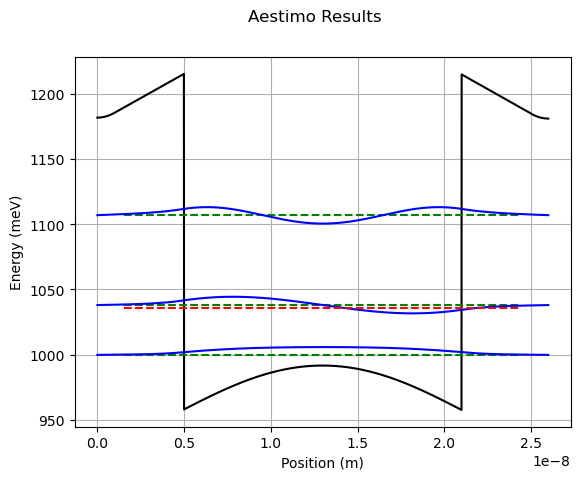

INFO Simulation is finished.


state, Energy
     ,meV
    0  999.85
    1 1038.02
    2 1106.91


In [5]:
s1 = copy.copy(s) #simpler than redefining everything and changes to s0 should propagate to s1
s1.material =[[ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
            [ 4.0, 'AlGaAs', x_frac, 0.0, 'n'],
            [ well_l, 'GaAs', 0, 0, 'n'],
            [ 4.0, 'AlGaAs', x_frac, 0.0, 'n'],
            [ 1.0, 'AlGaAs', x_frac, dopant, 'n']]
well_layer = 2 # defines which layer will be adjusted later

# Initialise structure class
model1 = solver.StructureFrom(s1,adatabase) # structure could also be a dictionary.

#calculate QW states
result1 = solver.Poisson_Schrodinger(model1)

#solver.save_and_plot(result,model)
solver.QWplot(result1,figno=None)
solver.logger.info("Simulation is finished.")

print('state, Energy')
print('     ,meV')
for num,E in zip(range(result1.subnumber_e),result1.E_state):
    print('%5d %7g' %(num,E))
     

In [6]:

def set_well(d):
    """Sets barriers between the two QWs to d (nm)."""
    model1.material[well_layer][0] = d
    model1.create_structure_arrays() # update the instance's internals

results = []
well_ls = [10.0,50.0,100.0]
for well_l in well_ls:
    set_well(well_l)
    resulti = solver.Poisson_Schrodinger(model1)
    results.append(resulti.E_state)

results = np.array(results)

ax1 = plt.subplot(111)
for level in results.transpose(): ax1.plot(well_ls,level)
ax1.invert_xaxis()
ax1.set_xlabel("barrier thickness (nm)")
ax1.set_ylabel("Energy (meV)")
plt.show()

INFO Ntotal2d 1e+16 m**-2
INFO Iteration: 1
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO Working for subband no: 3
INFO E[0]= 958.017611 meV
INFO E[1]= 1048.604424 meV
INFO E[2]= 1169.610817 meV
INFO meff[0]= 0.063405
INFO meff[1]= 0.068735
INFO meff[2]= 0.076718
INFO N[0]= 1e+16 m**-2
INFO N[1]= 3.11222e-76 m**-2
INFO N[2]= 0 m**-2
INFO Efermi (at 3K) = 995.22 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge = 1e+16 m**-2
INFO total system charge = -1419.27 m**-2
INFO Iteration: 2
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO Working for subband no: 3
INFO E[0]= 982.223901 meV
INFO E[1]= 1069.630229 meV
INFO E[2]= 1188.853557 meV
INFO meff[0]= 0.063423
INFO meff[1]= 0.068804
INFO meff[2]= 0.076895
INFO N[0]= 1e+16 m**-2
INFO N[1]= 5.48831e-72 m**-2
INFO N[2]= 0 m**-2
INFO Efermi (at 3K) = 1018.77 meV
INFO total donor charge = 1e+16 m**-2
INFO total level charge = 1e+16 m**-2
INFO total system charge = 53.25 m**-2
INFO Iterati

KeyboardInterrupt: 